<a href="https://colab.research.google.com/github/girileo10/Football_Data_Analysis/blob/master/football_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOOTBALL DATA ANALYSIS USING DATA COLLECTED FROM 2012/13 SEASON TO 2016/17 SEASON**

**Importing required libraries**

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory 

from subprocess import check_output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
os.environ["KAGGLE_USERNAME"]="giri10"
os.environ["KAGGLE_KEY"]="4653aa2230f03b1c301f781913879b4d"

In [4]:
! kaggle datasets download -d secareanualin/football-events

 81% 17.0M/21.1M [00:00<00:00, 64.0MB/s]
100% 21.1M/21.1M [00:00<00:00, 70.0MB/s]


In [5]:
! unzip football-events.zip

Archive:  football-events.zip
  inflating: dictionary.txt          
  inflating: events.csv              
  inflating: ginf.csv                


In [6]:
print(check_output(["ls", "./"]).decode("utf8"))

dictionary.txt
events.csv
football-events.zip
ginf.csv
sample_data



In [7]:
# Loading events dataset
df_events = pd.read_csv("./events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf = pd.read_csv("./ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]

In [8]:
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events = df_events.merge(df_ginf, how='left')

In [9]:
## Naming the leagues with their popular names, which will make things much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}

In [10]:
## Apply the mapping
df_events['league'] = df_events['league'].map(leagues)

In [11]:
## Events type 1
event_type_1 = pd.Series([
    'Announcement',
    'Attempt',
    'Corner',
    'Foul',
    'Yellow card',
    'Second yellow card',
    'Red card',
    'Substitution',
    'Free kick won',
    'Offside',
    'Hand ball',
    'Penalty conceded'], index=[[item for item in range(0, 12)]])

## Events type 2
event_type2 = pd.Series(['Key Pass', 'Failed through ball', 'Sending off', 'Own goal'],
                       index=[[item for item in range(12, 16)]])

## Match side
side = pd.Series(['Home', 'Away'], index=[[item for item in range(1, 3)]])

## Shot place
shot_place = pd.Series([
    'Bit too high', 
    'Blocked',
    'Bottom left corner',
    'Bottom right corner',
    'Centre of the goal',
    'High and wide',
    'Hits the bar',
    'Misses to the left',
    'Misses to the right',
    'Too high',
    'Top centre of the goal',
    'Top left corner',
    'Top right corner'
], index=[[item for item in range(0, 13)]])

## Outcome of shot
shot_outcome = pd.Series(['On target', 'Off target', 'Blocked', 'Hit the bar'],
                        index=[[item for item in range(1, 5)]])
## Location of shot
location = pd.Series([
    'Attacking half',
    'Defensive half',
    'Centre of the box',
    'Left wing',
    'Right wing',
    'Difficult angle and long range',
    'Difficult angle on the left',
    'Difficult angle on the right',
    'Left side of the box',
    'Left side of the six yard box',
    'Right side of the box',
    'Right side of the six yard box',
    'Very close range',
    'Penalty spot',
    'Outside the box',
    'Long range',
    'More than 35 yards',
    'More than 40 yards',
    'Not recorded'
], 
index=[[item for item in range(1, 20)]])

## Players' body part
bodypart = pd.Series(['right foot', 'left foot', 'head'], index=[[item for item in range(1, 4)]])

## Assist method
assist_method = pd.Series(['None', 'Pass', 'Cross', 'Headed pass', 'Through ball'],
                         index=[item for item in range(0, 5)])

## Situation
situation = pd.Series(['Open play', 'Set piece', 'Corner', 'Free kick'],
                     index=[item for item in range(1, 5)])

In [12]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")   # Proposed themes: darkgrid, whitegrid, dark, white, and ticks

    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

**EVENTS IN FOOTBALL MATCH**

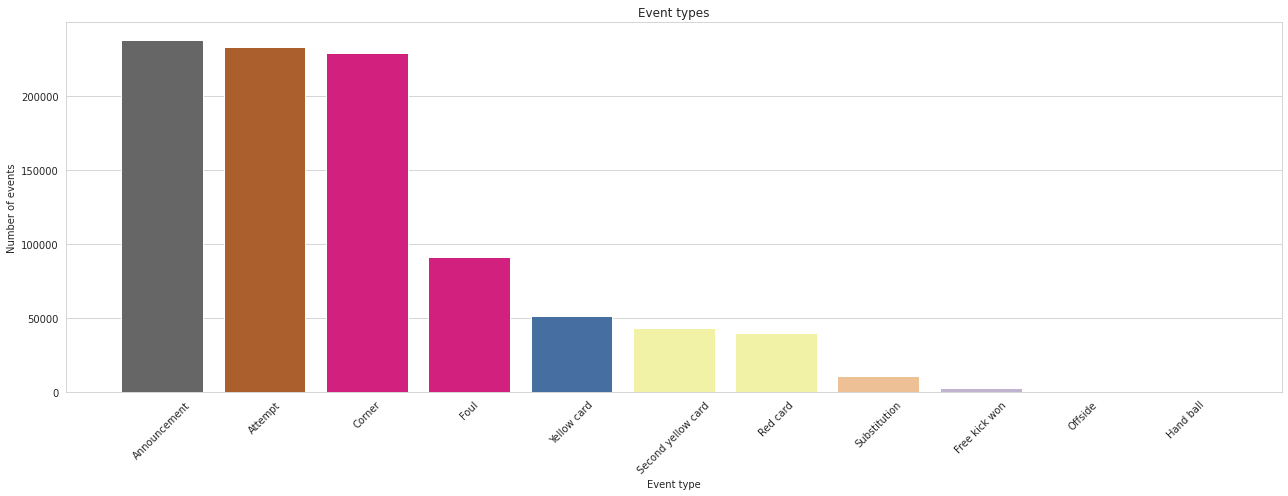

In [13]:
## Count of events occurecies
events_series = df_events['event_type'].value_counts()

## Plotting chart 
plot_barplot(events_series, event_type_1.values,
            "Event type", "Number of events", "Event types", 'Accent_r', 18, 7)

**SHOT PLACES RESULTING IN GOALS**

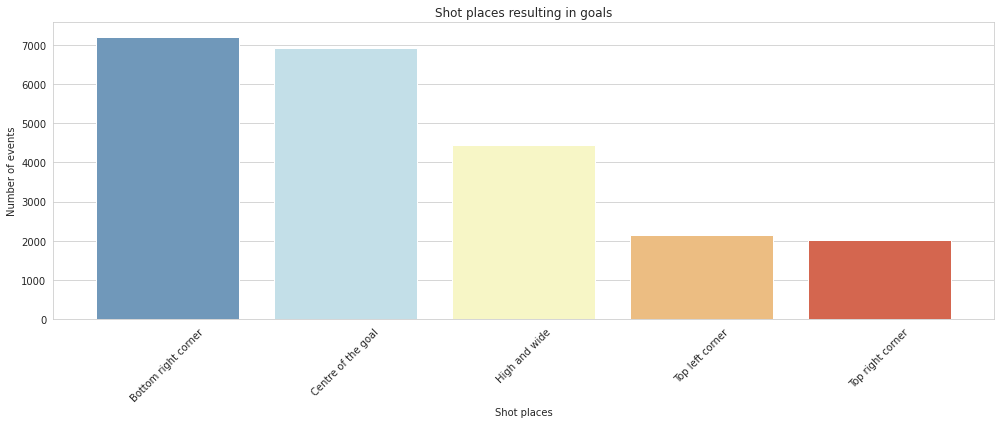

In [14]:
## Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 1)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place[[3, 4, 5, 11, 12]], 'Shot places', 'Number of events',
    'Shot places resulting in goals', 'RdYlBu_r', 14, 6)

**SHOT PLACES NOT RESULTING IN GOALS**

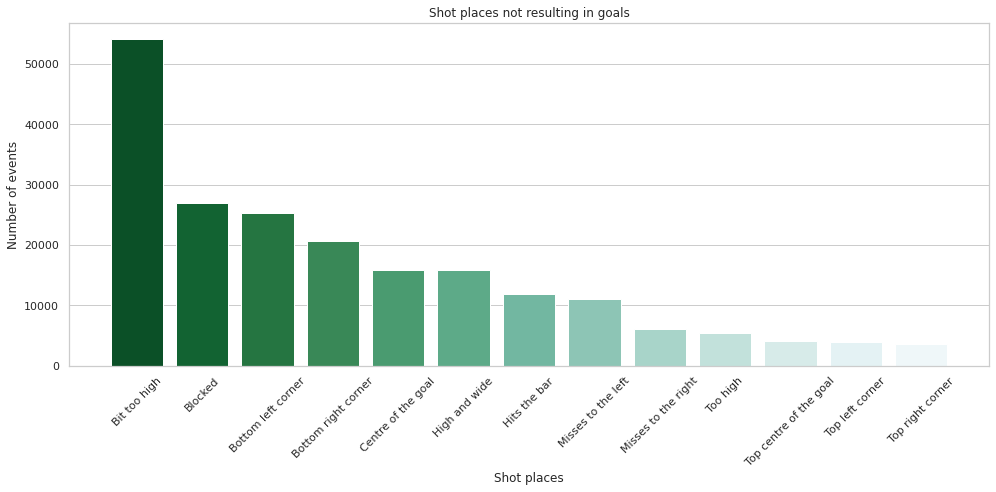

In [43]:
# Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 0)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place, 'Shot places', 'Number of events',
    'Shot places not resulting in goals', 'BuGn_r', 14, 7)

**MOST OFFENSIVE TEAMS**

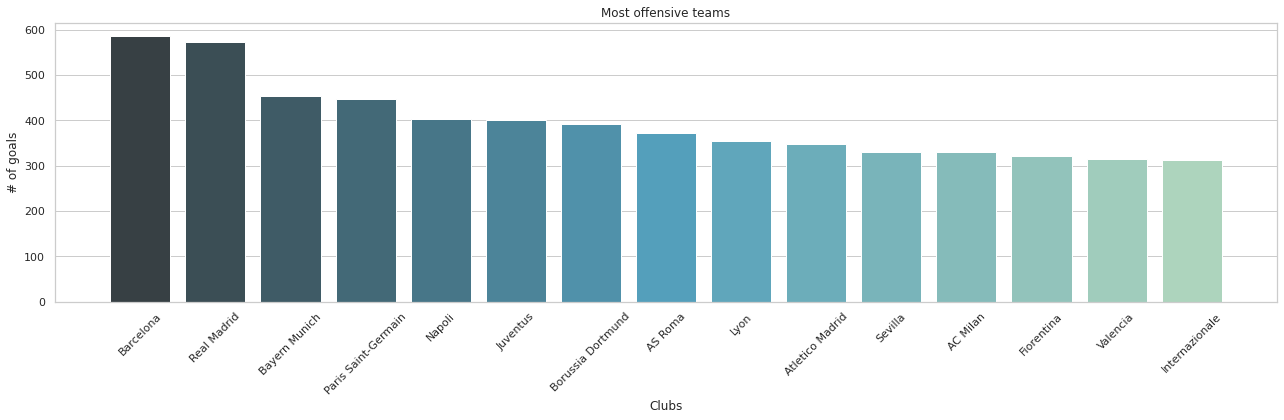

In [44]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:15]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Clubs', '# of goals', 'Most offensive teams', 'GnBu_d', 18, 6)


**LESS OFFENSIVE TEAMS**

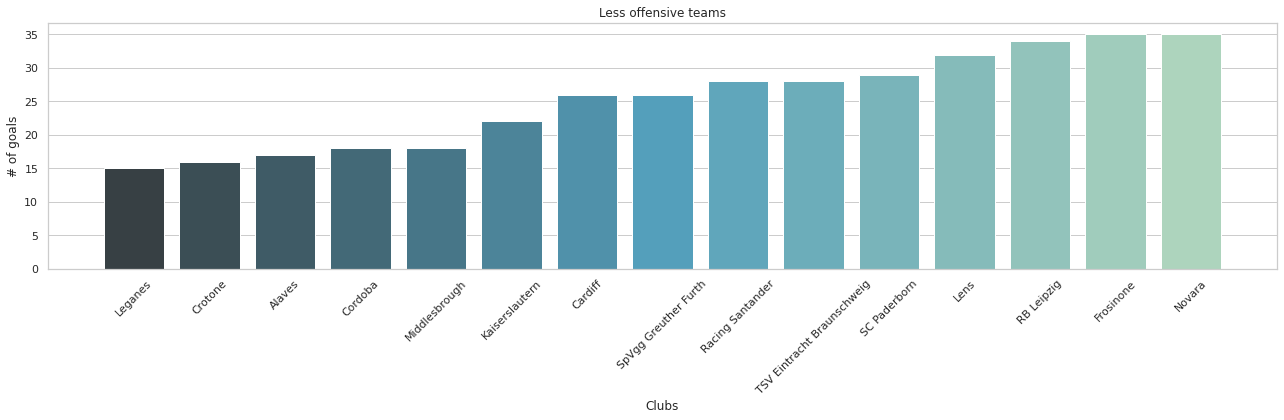

In [45]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=True)[:15]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Clubs', '# of goals', 'Less offensive teams', 'GnBu_d', 18, 6)

**MOST OFFENSIVE PLAYERS**

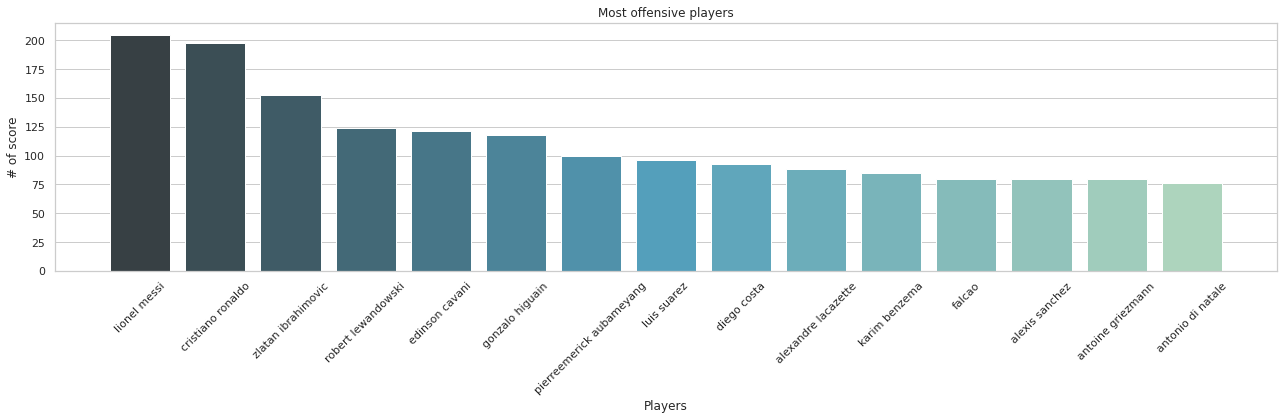

In [46]:
## grouping by player when is goal
grouping_by_offensive_player = df_events[df_events['is_goal']==1].groupby('player')

## Couting and sorting the number of goals by player, then pick the top 10
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:15]
## Extracting player names
players = grouping_by_offensive_player.index

## Extracting values (# of goals)
scores = grouping_by_offensive_player['id_event']

## Plotting the chart
plot_barplot(scores, players, 'Players', '# of score', 'Most offensive players', 'GnBu_d', 18, 6)

In [48]:
## Loading events dataset
df_events1 = pd.read_csv("./events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf1 = pd.read_csv("./ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events1 = df_events1.merge(df_ginf1, how='left')
df_events1 = df_events1[['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team', 'is_goal']]
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}
## Apply the mapping
df_events1['league'] = df_events1['league'].map(leagues)


In [49]:
df_events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941009 entries, 0 to 941008
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_odsp     941009 non-null  object
 1   id_event    941009 non-null  object
 2   league      941009 non-null  object
 3   season      941009 non-null  int64 
 4   ht          941009 non-null  object
 5   at          941009 non-null  object
 6   event_team  941009 non-null  object
 7   is_goal     941009 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 64.6+ MB


In [50]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
Leagues = df_events1['league'].unique()
Seasons = list(df_events1['season'].unique())
print(Leagues)
print(Seasons)

['Bundesliga' 'League One' 'La Liga' 'Serie A' 'Premier League']
[2012, 2013, 2014, 2015, 2016, 2017]


**NUMBER OF GOALS SCORED AT EVERY MINUTE OF THE MATCH**

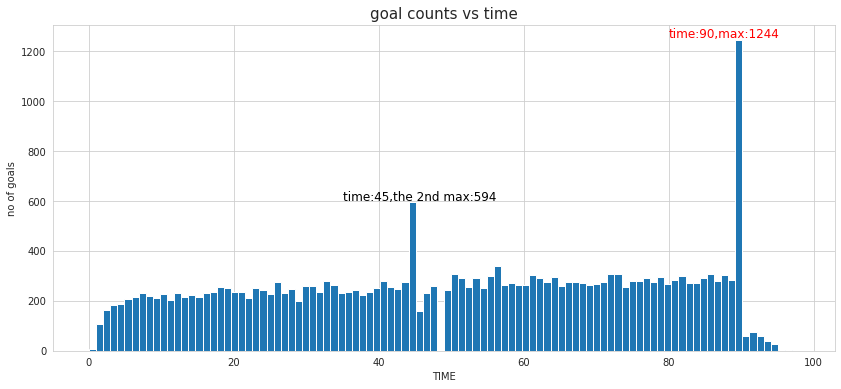

In [23]:
## grouping by player when it is a goal
goal = df_events[df_events['is_goal']==1]

## Plotting the hist
fig=plt.figure(figsize=(14,6))
plt.hist(goal.time, 100)
plt.xlabel("TIME",fontsize=10)
plt.ylabel("no of goals",fontsize=10)
plt.title("goal counts vs time",fontsize=15)
x=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[0]
y=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[0]
x1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[1]
y1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[1]
plt.text(x=x-10,y=y+10,s='time:'+str(x)+',max:'+str(y),fontsize=12,fontdict={'color':'red'})
plt.text(x=x1-10,y=y1+10,s='time:'+str(x1)+',the 2nd max:'+str(y1),fontsize=12,fontdict={'color':'black'})
plt.show()

**RED CARDS PER TEAM**

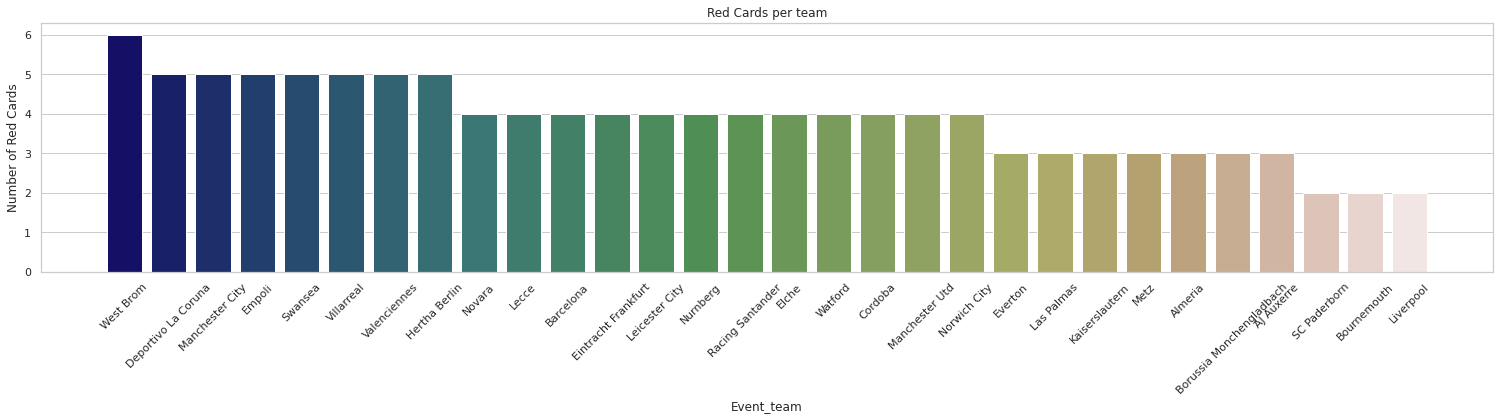

In [56]:
redCards = df_events[df_events['event_type'] == 6]['event_team']

redCards_series = redCards.value_counts().sort_values(ascending=True)[49:19:-1]

## Plotting chart 
plot_barplot(redCards_series, redCards_series.index,
            "Event_team", "Number of Red Cards", "Red Cards per team", 'gist_earth', 21, 6)


**YELLOW CARDS PER TEAM**

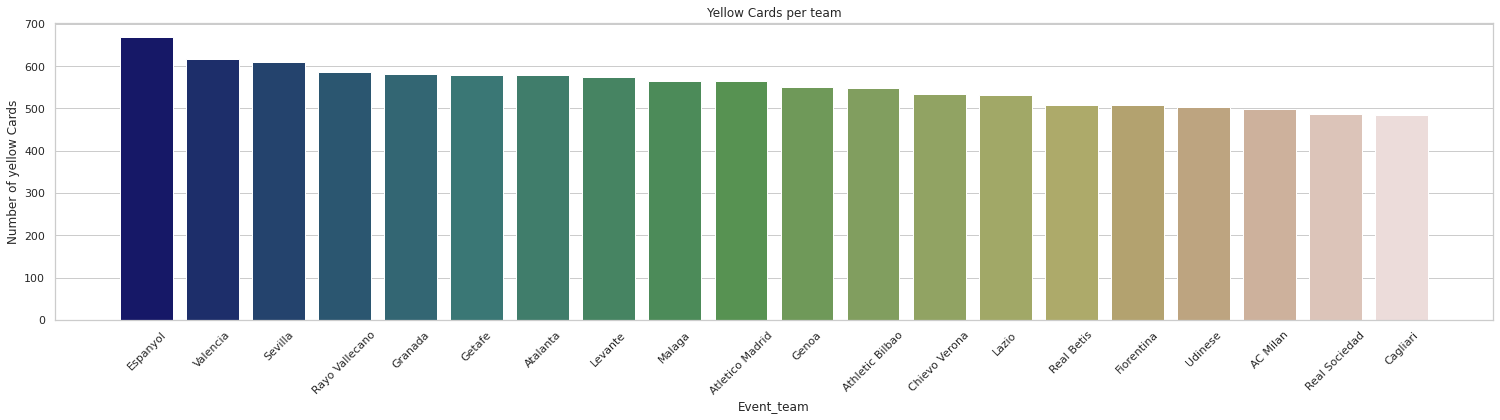

In [57]:
yellowCards = df_events[df_events['event_type'] == (4 or 5)]['event_team']

## Count of events occurecies
yellowCards_series = yellowCards.value_counts()[:20]

## Plotting chart 
plot_barplot(yellowCards_series, yellowCards_series.index,
            "Event_team", "Number of yellow Cards", "Yellow Cards per team", 'gist_earth', 21, 6)

**FUNCTION TO PLOT TEAM STRATEGY OF GIVEN TEAM**

In [58]:
def Team_strategy(team):  
    goal = df_events[df_events['is_goal']==1][df_events['event_team'] == team]
    plt.hist(goal[goal["situation"]==1]["time"],width=1,bins=100,label="Open play")   
    plt.hist(goal[goal["situation"]==2]["time"],width=1,bins=100,label="Set Piece (excluding direct FreeKick)") 
    plt.hist(goal[goal["situation"]==3]["time"],width=1,bins=100,label="Corners") 
    plt.hist(goal[goal["situation"]==4]["time"],width=1,bins=100,label="Direct Free Kick") 
    plt.xlabel("Minutes")
    plt.ylabel("Number of goals")
    plt.legend()
    plt.title("Number of goals (by situations) against Time during match for {}".format(team),fontname="DejaVu Sans",fontsize=14,fontweight="bold")
    plt.tight_layout()

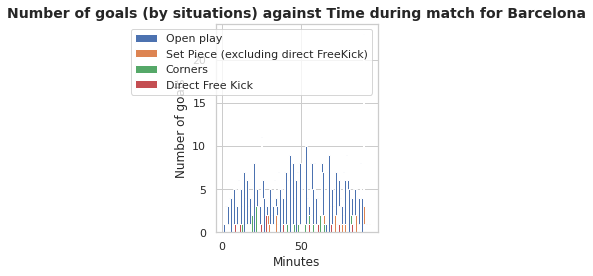

In [59]:
#plt.subplot(4,1,1)
team = 'Barcelona'
Team_strategy(team)


**MOST EFFECTIVE PLAYER IN TERMS OF SHOTS PER GOAL**

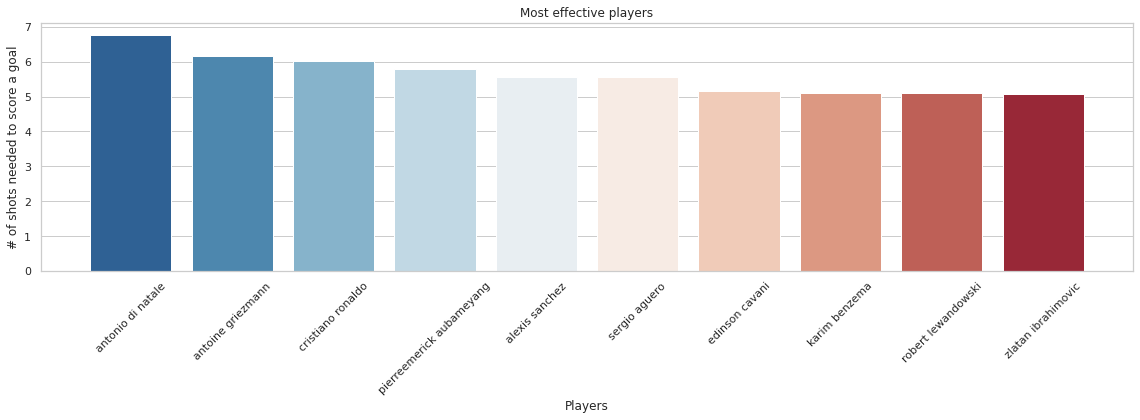

In [66]:
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('player').count()
grouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('player').count()
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('player').count()
threshold = grouped_by_player['is_goal'].std()
grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('player').count()
grouped_by_player_is_goal_filtered = grouped_by_player_is_goal[grouped_by_player_is_goal['is_goal'] >= threshold ]
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['is_goal'] >= threshold ]

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=False)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Players', 
            '# of shots needed to score a goal',
            'Most effective players',
            'RdBu_r', 16, 6)

**PLAYER EFFECTIVENESS**

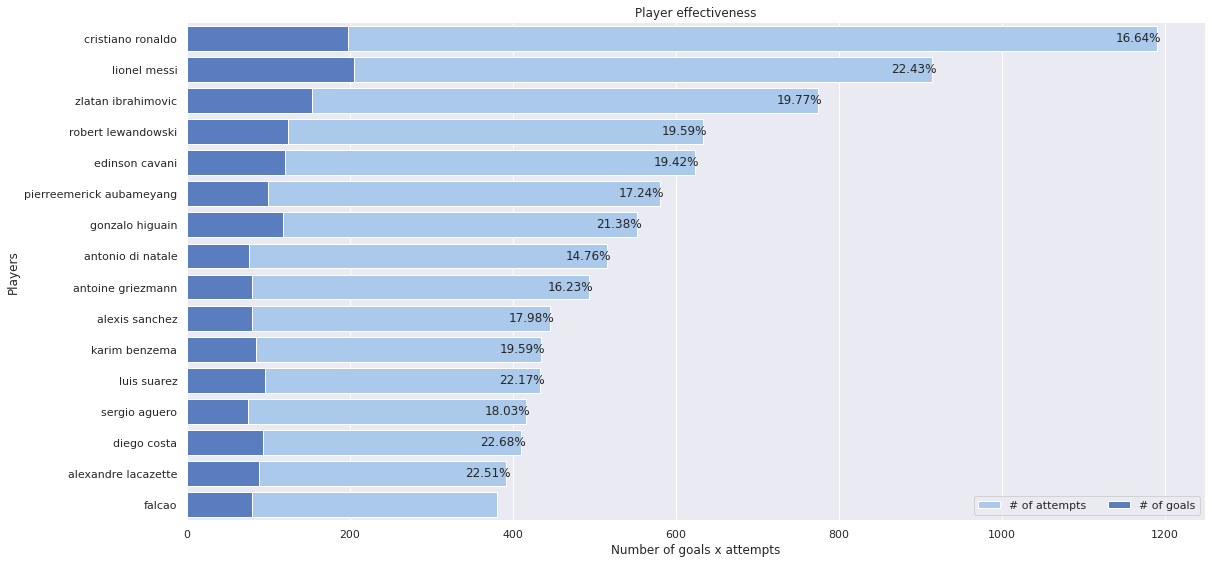

In [67]:
## Creating a dataframe with total of attempts and total goals
result_df = pd.DataFrame({'total': total.dropna(), 'is_goal': grouped_by_player_is_goal_filtered['id_event']})
## Sorting values by total
result_df.sort_values('total', ascending=False, inplace=True)

## Setting style to dark
sns.set(style="darkgrid")

## Creating figure
f, ax = plt.subplots(figsize=(17, 8))

## Plotting chart
sns.set_color_codes("pastel")
sns.barplot(x="total",
            y=result_df.index,
            data=result_df,
            label="# of attempts", color="b")

sns.set_color_codes("muted")
sns.barplot(x='is_goal',
            y=result_df.index, 
            data=result_df,
            label="# of goals", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Players",
       xlabel="Number of goals x attempts", title='Player effectiveness')

each = result_df['is_goal'].values
the_total = result_df['total'].values
x_position = 50

for i in range(len(ax.patches[:15])):
    ax.text(ax.patches[i].get_width() - x_position, ax.patches[i].get_y() +.50, 
            str(round((each[i]/the_total[i])*100, 2))+'%')
    
sns.despine(left=True, bottom=True)
f.tight_layout()
